### reading data into the file 

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,svm 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection,metrics 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict

In [20]:
raw_data='train.csv'
df = pd.read_csv(raw_data)
df1=df

In [3]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       181931
MarkDown2       208219
MarkDown3       190930
MarkDown4       192420
MarkDown5       181422
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [4]:
df = df.assign(md1_present = df.MarkDown1.notnull())
df = df.assign(md2_present = df.MarkDown2.notnull())
df = df.assign(md3_present = df.MarkDown3.notnull())
df = df.assign(md4_present = df.MarkDown4.notnull())
df = df.assign(md5_present = df.MarkDown5.notnull())

In [5]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       181931
MarkDown2       208219
MarkDown3       190930
MarkDown4       192420
MarkDown5       181422
CPI                  0
Unemployment         0
Type                 0
Size                 0
md1_present          0
md2_present          0
md3_present          0
md4_present          0
md5_present          0
dtype: int64

In [6]:
df.fillna(0, inplace=True)

In [7]:
df['Type'] = 'Type_' + df['Type'].map(str)
df['Store'] = 'Store_' + df['Store'].map(str)
df['Dept'] = 'Dept_' + df['Dept'].map(str)

In [8]:
# Create dummies
type_dummies = pd.get_dummies(df['Type'])
store_dummies = pd.get_dummies(df['Store'])
dept_dummies = pd.get_dummies(df['Dept'])

In [9]:
# Add dummies
df = pd.concat([df,type_dummies,store_dummies,dept_dummies],axis=1)

In [10]:
del df['Type']
del df['Store']
del df['Dept']
del df['Date']

In [11]:
cor = df.corr(method = 'pearson').round(3)


In [12]:
cor

,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
Weekly_Sales,1.000,0.012,-0.001,0.003,0.050,0.020,0.036,0.038,0.051,-0.022,...,0.163,0.098,0.322,0.059,0.089,0.296,-0.004,-0.009,-0.048,-0.032
IsHoliday,0.012,1.000,-0.157,-0.077,-0.002,0.209,0.264,0.014,-0.015,-0.003,...,0.001,-0.001,-0.000,-0.000,-0.000,-0.001,-0.000,-0.001,0.000,0.005
Temperature,-0.001,-0.157,1.000,0.141,-0.026,-0.179,-0.057,-0.051,-0.015,0.181,...,0.003,0.003,0.006,0.001,0.004,0.003,0.008,0.003,0.000,0.005
Fuel_Price,0.003,-0.077,0.141,1.000,0.299,0.030,0.019,0.168,0.213,-0.164,...,0.000,-0.001,0.001,0.003,0.000,-0.000,0.000,0.001,0.004,0.022
MarkDown1,0.050,-0.002,-0.026,0.299,1.000,0.174,-0.014,0.839,0.411,0.012,...,-0.002,-0.003,-0.002,-0.001,-0.001,-0.002,-0.001,-0.002,-0.000,0.039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dept_95,0.296,-0.001,0.003,-0.000,-0.002,-0.001,-0.000,-0.001,-0.000,0.002,...,-0.016,-0.016,-0.015,-0.015,-0.015,1.000,-0.013,-0.015,-0.015,-0.006
Dept_96,-0.004,-0.000,0.008,0.000,-0.001,0.000,-0.001,-0.001,0.001,-0.001,...,-0.014,-0.014,-0.013,-0.013,-0.013,-0.013,1.000,-0.013,-0.013,-0.005
Dept_97,-0.009,-0.001,0.003,0.001,-0.002,-0.000,-0.000,0.000,-0.002,-0.003,...,-0.015,-0.015,-0.015,-0.015,-0.014,-0.015,-0.013,1.000,-0.015,-0.006
Dept_98,-0.048,0.000,0.000,0.004,-0.000,0.000,0.002,-0.000,0.000,-0.005,...,-0.015,-0.015,-0.015,-0.014,-0.014,-0.015,-0.013,-0.015,1.000,-0.005


In [13]:
train = df.iloc[:282451]
test = df.iloc[282451:]
test = test.drop('Weekly_Sales',axis=1) # We should remove the nonsense values from test
#To get numpy arrays out of the pandas data frame, we can ask for a columns, or dataframes values

y = train['Weekly_Sales']
X = train.drop('Weekly_Sales',axis=1)

In [14]:
from sklearn import linear_model, metrics

In [15]:
lr = linear_model.LinearRegression()
lr.fit(X, y)

y_pred = lr.predict(X)

In [16]:
Mse1 = np.sqrt(round(metrics.mean_squared_error(y_pred,y),3))
print('MSE for model1 is :',Mse1)

MSE for model1 is : 13220.803775489598


In [17]:
metrics.r2_score(y,y_pred)

0.6596266338722205

In [21]:
#Createing a DataFrame for numerical features
data1 = df1.drop(['IsHoliday', 'Type','Date'],axis=1)
print(data1.shape)
# Create a DataFrame for categorical features
cols_to_transform =pd.DataFrame(df1,columns=['Type'])
dummies1=pd.get_dummies(df1['IsHoliday'])
dummies1.rename(columns={True:'IsHoliday_1',False:'IsHoliday_0'},inplace=True)
dummies = pd.get_dummies(cols_to_transform)

(282451, 13)


## Principal component analysis feasibility study

In [22]:
data_transform=pd.concat([data1,dummies1,dummies],axis=1)
data_transform.head()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,IsHoliday_0,IsHoliday_1,Type_A,Type_B,Type_C
0,26,92,87235.57,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,152513,1,0,1,0,0
1,34,22,5945.97,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,158114,1,0,1,0,0
2,21,28,1219.89,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,140167,1,0,0,1,0
3,8,9,11972.71,75.32,2.582,NaN,NaN,NaN,NaN,NaN,214.878556,6.315,155078,1,0,1,0,0
4,19,55,8271.82,58.81,4.029,12613.98,NaN,11.5,1705.28,3600.79,138.106581,8.150,203819,1,0,1,0,0


# Transformation of data  

In [23]:
data_transform.Type_C

0         0
1         0
2         0
3         0
4         0
         ..
282446    0
282447    0
282448    0
282449    0
282450    0
Name: Type_C, Length: 282451, dtype: uint8

In [24]:
data_transform.fillna(0,inplace=True)

In [25]:
features = ['Store', 'Dept', 'Temperature', 'Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Size','IsHoliday_0','IsHoliday_1','Type_A','Type_B','Type_C']

In [26]:
X_Train=data_transform[features]
X_Actual=data_transform['Weekly_Sales']

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_Train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
train_transform = scaler.transform(X_Train)

In [29]:
train_transform[1]

array([ 0.92369954, -0.73060713, -0.37967408,  0.26101146, -0.42810274,
       -0.17176531, -0.08388145, -0.27806187, -0.3902481 , -1.08761323,
        1.30075795,  0.35054347,  0.27470531, -0.27470531,  0.97666802,
       -0.79517683, -0.33486476])

## Eigen value decomposition for PCA taking into account 95% of variance. 

In [30]:
from sklearn.decomposition import PCA
# taking into account the 95% of variance into account
pca = PCA(.95)

In [31]:
pca.fit(train_transform) # train_transform is the dataframe containg all the variables for ex 80

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [32]:
train_transform = pca.transform(train_transform) # projecting the variables into new space

In [33]:
pca.explained_variance_ratio_

array([0.16233844, 0.13279793, 0.1232699 , 0.10328482, 0.07829645,
       0.06489153, 0.05865676, 0.05578254, 0.05306255, 0.04583505,
       0.04161007, 0.03009259, 0.02910726])

In [34]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

### Plot to show the now of componets required for explaining the required variability.

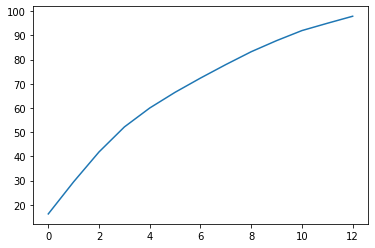

In [42]:
import matplotlib.pyplot as plt
plt.plot(var1)
plt.show()

In [37]:
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split

### training of dataset after split of data into train and test

In [38]:
X_train, X_test , y_train, y_test = train_test_split(train_transform,X_Actual, test_size=.15, random_state = 3)

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [39]:
y_train

117638     7684.54
171337    40389.62
31402      2864.63
80260       621.00
175053       52.35
            ...   
11261     37748.22
48056      2626.06
77049      2573.43
198296     2282.33
71530       579.99
Name: Weekly_Sales, Length: 240083, dtype: float64

### Mean standard error

In [40]:
Mse1 = np.sqrt(round(metrics.mean_squared_error(y_test,y_pred),3))
print('MSE for model1 is :',Mse1)

MSE for model1 is : 21814.938207934487


### R^2 for pca model

In [41]:
metrics.r2_score(y_test,y_pred)

0.08147736122677429

### from the feasibility study we can see that r^2 is low for linear regression at 62% and further lower for PCA and linear regression at 8.1% so we concluded that time related data set is not good for linear regression and PCA + Linear regression